# Revisiting the MNIST Dataset used in Chapter 2

In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [9]:
# Import the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
# Preparing the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
# Build the network
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
# Display model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [11]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.1684 - accuracy: 0.9472
Epoch 2/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0457 - accuracy: 0.9857
Epoch 3/5
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0322 - accuracy: 0.9904
Epoch 4/5
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0245 - accuracy: 0.9924
Epoch 5/5
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.0190 - accuracy: 0.9943


In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 6s 570us/sample - loss: 0.0283 - accuracy: 0.9916


0.9916

# Cats and Dogs Classification

In [13]:
import os, shutil

In [14]:
%pwd

'C:\\Users\\theta\\Desktop\\DS-Courses\\Deep Learning with Python\\Chapter 5'

In [21]:
# Path to the directory where the original dataset was uncompressed
original_dataset_dir = '/Users/theta/Desktop/DS-Courses/Deep Learning with Python/Chapter 5/data/kaggle_data'

# Directory where you'll store your smaller dataset
base_dir = '/Users/theta/Desktop/DS-Courses/Deep Learning with Python/Chapter 5/data/cats_and_dogs_small'
os.mkdir(base_dir)

In [17]:
# Create directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [18]:
# Create directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Create directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [19]:
# Create directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Create directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [20]:
# Create directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Create directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [22]:
# Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [23]:
# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [24]:
# Copies the next 500 cat images to test_cats_dir
fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [25]:
# Copies the first 1,000 dog images to train_dogs_dir
fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [26]:
# Copies the next 500 dog images to validation_dogs_dir
fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [27]:
# Copies the next 500 dog images to test_dogs_dir
fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [28]:
# Sanity check: count how many pictures are in each training split
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [29]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
# Inspect the model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

In [33]:
from tensorflow.keras.optimizers import RMSprop

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])

### Data preprocessing

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
# Rescales all images by 1/255
train_datagen1 = ImageDataGenerator(rescale=1./255)
test_datagen1 = ImageDataGenerator(rescale=1./255)

train_generator1 = train_datagen1.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=20, class_mode='binary')

validation_generator1 = test_datagen1.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [61]:
len(validation_generator1)

50

In [38]:
# Fitting the model using a batch generator
history = model.fit(train_generator1, steps_per_epoch=100, epochs=30,
                    validation_data=validation_generator, validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 165s 2s/step - loss: 0.6872 - accuracy: 0.5480 - val_loss: 0.6676 - val_accuracy: 0.5920
Epoch 2/30
100/100 [==============================] - 161s 2s/step - loss: 0.6536 - accuracy: 0.6085 - val_loss: 0.6639 - val_accuracy: 0.5760
Epoch 3/30
100/100 [==============================] - 169s 2s/step - loss: 0.6119 - accuracy: 0.6660 - val_loss: 0.6077 - val_accuracy: 0.6700
Epoch 4/30
100/100 [==============================] - 169s 2s/step - loss: 0.5645 - accuracy: 0.7060 - val_loss: 0.5825 - val_accuracy: 0.6910
Epoch 5/30
100/100 [==============================] - 171s 2s/step - loss: 0.5290 - accuracy: 0.7315 - val_loss: 0.5839 - val_accuracy: 0.6890
Epoch 6/30
100/100 [==============================] - 171s 2s/step - loss: 0.4952 - accuracy: 0.7525 - val_loss: 0.6461 - val_accuracy: 0.6810
Epoch 7/30
100/100 [=============================

### Note:

It's good practice to always save your models after training

In [39]:
# Saving the model
model.save('cats_and_dogs_small_1.h5')

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

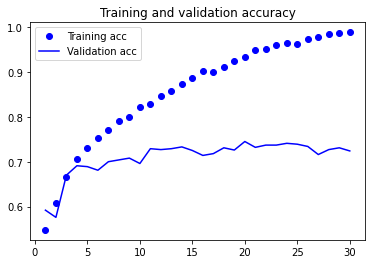

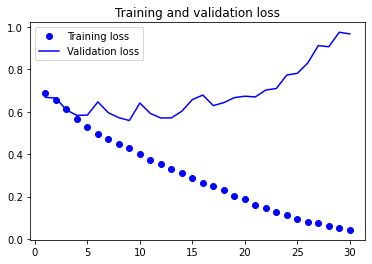

In [41]:
import matplotlib.pyplot as plt

# Displaying curves of loss and accuracy during training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Setting up a data augmentation configuration via ImageDataGenerator

In [42]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

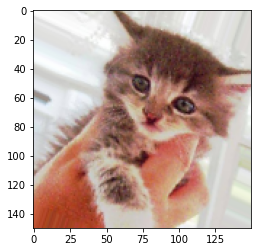

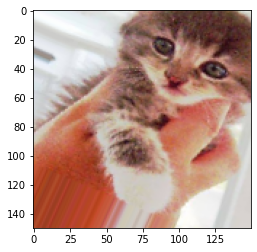

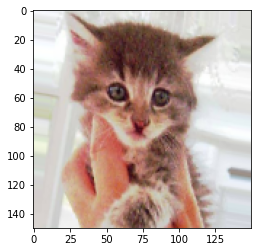

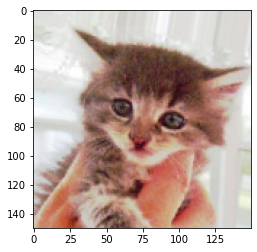

In [43]:
# Displaying some randomly augmented training images

from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# Choose one image to augment
img_path = fnames[3]

# Reads the image and resizes it
img = image.load_img(img_path, target_size=(150, 150))

# Converts image to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshapes image to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# Generates batches of randomly transformed images.
# Loops indefinitely, so you need to break the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [45]:
from tensorflow.keras.layers import Dropout

# Defining a new model that includes dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])

In [50]:
train_dir

'/Users/theta/Desktop/DS-Courses/Deep Learning with Python/Chapter 5/data/cats_and_dogs_small\\train'

In [67]:
%pwd

'C:\\Users\\theta\\Desktop\\DS-Courses\\Deep Learning with Python\\Chapter 5'

In [68]:
batch_size = 32

In [65]:
# Training the model using data-augmentation generators
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Note: the validation data shouldn't be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training generator
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

# Create validation generator
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), 
                                                        batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [66]:
len(train_generator)

63

In [ ]:
# Code from book not working
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=validation_generator, validation_steps=50)

In [69]:
# Train the model
history = model.fit_generator(train_generator, steps_per_epoch=2000 // batch_size, epochs=100, 
                              validation_data=validation_generator, validation_steps=1000 // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 31 steps
Epoch 1/100
62/62 [==============================] - 156s 3s/step - loss: 0.6663 - accuracy: 0.5894 - val_loss: 0.6641 - val_accuracy: 0.5786
Epoch 2/100
62/62 [==============================] - 159s 3s/step - loss: 0.6547 - accuracy: 0.6103 - val_loss: 0.6360 - val_accuracy: 0.6290
Epoch 3/100
62/62 [==============================] - 158s 3s/step - loss: 0.6428 - accuracy: 0.6194 - val_loss: 0.6269 - val_accuracy: 0.6462
Epoch 4/100
62/62 [==============================] - 153s 2s/step - loss: 0.6338 - accuracy: 0.6372 - val_loss: 0.6107 - val_accuracy: 0.6663
Epoch 5/100
62/62 [==============================] - 170s 3s/step - loss: 0.6252 - accuracy: 0.6438 - val_loss: 0.5983 - val_accuracy: 0.6683
Epoch 6/100
62/62 [==============================] - 157s 3s/step - loss: 0.6132 - accuracy: 0.6606 - val_loss: 0.6074 - val_accuracy: 0.6522
Epoch 7/100
62/62 [==============================] - 170

Epoch 57/100
62/62 [==============================] - 202s 3s/step - loss: 0.4758 - accuracy: 0.7652 - val_loss: 0.4796 - val_accuracy: 0.7631
Epoch 58/100
62/62 [==============================] - 232s 4s/step - loss: 0.4643 - accuracy: 0.7718 - val_loss: 0.4844 - val_accuracy: 0.7692
Epoch 59/100
62/62 [==============================] - 195s 3s/step - loss: 0.4707 - accuracy: 0.7683 - val_loss: 0.5053 - val_accuracy: 0.7520
Epoch 60/100
62/62 [==============================] - 195s 3s/step - loss: 0.4531 - accuracy: 0.7835 - val_loss: 0.5534 - val_accuracy: 0.7188
Epoch 61/100
62/62 [==============================] - 156s 3s/step - loss: 0.4641 - accuracy: 0.7698 - val_loss: 0.5268 - val_accuracy: 0.7349
Epoch 62/100
62/62 [==============================] - 171s 3s/step - loss: 0.4622 - accuracy: 0.7744 - val_loss: 0.5238 - val_accuracy: 0.7238
Epoch 63/100
62/62 [==============================] - 164s 3s/step - loss: 0.4583 - accuracy: 0.7769 - val_loss: 0.6006 - val_accuracy: 0.6986

In [70]:
# Saving the model
model.save('cats_and_dogs_small_2.h5')

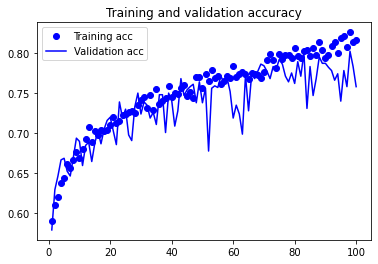

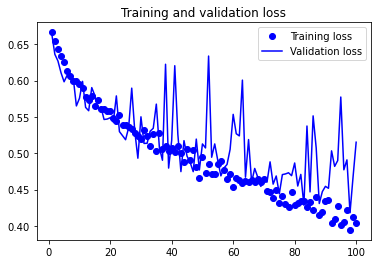

In [71]:
# Displaying curves of loss and accuracy during training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()